In [ ]:
!gdown 1ditFn_74EOsGnblf2nXr-Vx-I1mrCG42

Downloading...
From: https://drive.google.com/uc?id=1ditFn_74EOsGnblf2nXr-Vx-I1mrCG42
To: /content/TRAIN.csv
100% 9.33M/9.33M [00:00<00:00, 57.6MB/s]


In [ ]:
!gdown 1CclWDHsFLfCAuBbAv83_D5_XmeoRwWzl

Downloading...
From: https://drive.google.com/uc?id=1CclWDHsFLfCAuBbAv83_D5_XmeoRwWzl
To: /content/TEST_FINAL.csv
100% 849k/849k [00:00<00:00, 56.6MB/s]


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df_train=pd.read_csv('TRAIN.csv')

In [ ]:
df_train.head()

,ID,Store_id,Store_Type,Location_Type,Region_Code,Date,Holiday,Discount,#Order,Sales
0,T1000001,1,S1,L3,R1,2018-01-01,1,Yes,9,7011.84
1,T1000002,253,S4,L2,R1,2018-01-01,1,Yes,60,51789.12
2,T1000003,252,S3,L2,R1,2018-01-01,1,Yes,42,36868.20
3,T1000004,251,S2,L3,R1,2018-01-01,1,Yes,23,19715.16
4,T1000005,250,S2,L3,R4,2018-01-01,1,Yes,62,45614.52


In [ ]:
df_train.columns

Index(['ID', 'Store_id', 'Store_Type', 'Location_Type', 'Region_Code', 'Date',
       'Holiday', 'Discount', '#Order', 'Sales'],
      dtype='object')

In [ ]:
df_train.duplicated().sum()

np.int64(0)

In [ ]:
df_test=pd.read_csv('TEST_FINAL.csv')

In [ ]:
df_test.head()

,ID,Store_id,Store_Type,Location_Type,Region_Code,Date,Holiday,Discount
0,T1188341,171,S4,L2,R3,2019-06-01,0,No
1,T1188342,172,S1,L1,R1,2019-06-01,0,No
2,T1188343,173,S4,L2,R1,2019-06-01,0,No
3,T1188344,174,S1,L1,R4,2019-06-01,0,No
4,T1188345,170,S1,L1,R2,2019-06-01,0,No


In [ ]:
df_test.duplicated().sum()

np.int64(0)

In [ ]:
df_train[df_train["Sales"]==0]

,ID,Store_id,Store_Type,Location_Type,Region_Code,Date,Holiday,Discount,#Order,Sales
23867,T1023868,311,S4,L2,R2,2018-03-07,0,No,0,0.0
38143,T1038144,222,S4,L2,R2,2018-04-15,1,No,0,0.0
90458,T1090459,233,S1,L3,R3,2018-09-05,0,No,0,0.0
97301,T1097302,271,S1,L3,R2,2018-09-24,0,No,0,0.0
97480,T1097481,271,S1,L3,R2,2018-09-25,0,No,0,0.0
99489,T1099490,12,S1,L3,R2,2018-09-30,0,No,0,0.0
99904,T1099905,12,S1,L3,R2,2018-10-01,0,No,0,0.0
100215,T1100216,12,S1,L3,R2,2018-10-02,1,No,0,0.0
112564,T1112565,39,S4,L1,R1,2018-11-05,0,No,0,0.0
112853,T1112854,39,S4,L1,R1,2018-11-06,1,No,0,0.0


In [ ]:
df_test.columns

Index(['ID', 'Store_id', 'Store_Type', 'Location_Type', 'Region_Code', 'Date',
       'Holiday', 'Discount'],
      dtype='object')

In [ ]:
df_train.rename(columns={'#Order': 'No_of_orders'}, inplace=True)

In [ ]:
# Convert 'Date' to datetime format
df_train['Date'] = pd.to_datetime(df_train['Date'])

# Convert the following columns to categorical and boolean
categorical_columns = ['Store_id', 'Store_Type', 'Location_Type', 'Region_Code']
df_train[categorical_columns] = df_train[categorical_columns].astype('category')

df_train['Discount'] = df_train['Discount'].astype(bool)
df_train['Holiday'] = df_train['Holiday'].astype(bool)


# Convert 'Date' to datetime format
df_test['Date'] = pd.to_datetime(df_test['Date'])

# Convert the following columns to categorical
categorical_columns = ['Store_id', 'Store_Type', 'Location_Type', 'Region_Code']
df_test[categorical_columns] = df_test[categorical_columns].astype('category')
df_test['Discount'] = df_test['Discount'].astype(bool)
df_test['Holiday'] = df_test['Holiday'].astype(bool)


In [ ]:
# Month extract
df_train["Month"] = df_train['Date'].dt.month
df_test["Month"] = df_test['Date'].dt.month

In [ ]:
# weekday extract
df_train['Weekday'] = df_train['Date'].dt.weekday  # 0 = Monday
df_test['Weekday'] = df_test['Date'].dt.weekday  # 0 = Monday

In [ ]:
# week number extract
df_train['Week'] = df_train['Date'].dt.isocalendar().week
df_test['Week'] = df_test['Date'].dt.isocalendar().week

In [ ]:
df_train.head()

,ID,Store_id,Store_Type,Location_Type,Region_Code,Date,Holiday,Discount,No_of_orders,Sales,Month,Weekday,Week
0,T1000001,1,S1,L3,R1,2018-01-01,True,True,9,7011.84,1,0,1
1,T1000002,253,S4,L2,R1,2018-01-01,True,True,60,51789.12,1,0,1
2,T1000003,252,S3,L2,R1,2018-01-01,True,True,42,36868.20,1,0,1
3,T1000004,251,S2,L3,R1,2018-01-01,True,True,23,19715.16,1,0,1
4,T1000005,250,S2,L3,R4,2018-01-01,True,True,62,45614.52,1,0,1


In [ ]:
# df_train["Discount"]=df_train["Discount"].apply(lambda x:1 if x.lower()=="yes" else 0)
# df_test["Discount"]=df_test["Discount"].apply(lambda x:1 if x.lower()=="yes" else 0)

In [ ]:
df_train = df_train.sort_values(by=['Store_id', 'Date'])
# df_test = df_test.sort_values(by=['Store_id', 'Date'])

In [ ]:
df_train.head(10)

,ID,Store_id,Store_Type,Location_Type,Region_Code,Date,Holiday,Discount,No_of_orders,Sales,Month,Weekday,Week
0,T1000001,1,S1,L3,R1,2018-01-01,True,True,9,7011.84,1,0,1
607,T1000608,1,S1,L3,R1,2018-01-02,False,True,60,42369.00,1,1,1
1046,T1001047,1,S1,L3,R1,2018-01-03,False,True,72,50037.00,1,2,1
1207,T1001208,1,S1,L3,R1,2018-01-04,False,True,64,44397.00,1,3,1
1752,T1001753,1,S1,L3,R1,2018-01-05,False,True,63,47604.00,1,4,1
2162,T1002163,1,S1,L3,R1,2018-01-06,False,True,36,24495.00,1,5,1
2333,T1002334,1,S1,L3,R1,2018-01-07,False,True,55,36855.00,1,6,1
2741,T1002742,1,S1,L3,R1,2018-01-08,False,True,52,34101.00,1,0,2
3066,T1003067,1,S1,L3,R1,2018-01-09,False,True,65,42429.00,1,1,2
3299,T1003300,1,S1,L3,R1,2018-01-10,False,True,53,33510.00,1,2,2


In [ ]:
# df = df_train[df_train["Store_id"]==1]

In [ ]:
df_train['Sales_log'] = np.log1p(df_train['Sales'])

In [ ]:
# Create lag features for the past 1 , 2, 7 days
lags=[1,2,3,4,7]
for lag in lags:
    df_train[f'Sales_lag_{lag}'] = df_train.groupby('Store_id')['Sales_log'].shift(lag)


In [ ]:
# Calculate 7-day and 14-day rolling means per store
df_train['Sales_roll_7'] = df_train.groupby('Store_id')['Sales_log'].transform(lambda x: x.rolling(window=7, min_periods=1).mean())
df_train['Sales_roll_14'] = df_train.groupby('Store_id')['Sales_log'].transform(lambda x: x.rolling(window=14, min_periods=1).mean())

In [ ]:
df_train[df_train["Store_id"]==1].head(10)

,ID,Store_id,Store_Type,Location_Type,Region_Code,Date,Holiday,Discount,No_of_orders,Sales,...,Weekday,Week,Sales_log,Sales_lag_1,Sales_lag_2,Sales_lag_3,Sales_lag_4,Sales_lag_7,Sales_roll_7,Sales_roll_14
0,T1000001,1,S1,L3,R1,2018-01-01,True,True,9,7011.84,...,0,1,8.855498,NaN,NaN,NaN,NaN,NaN,8.855498,8.855498
607,T1000608,1,S1,L3,R1,2018-01-02,False,True,60,42369.00,...,1,1,10.654196,8.855498,NaN,NaN,NaN,NaN,9.754847,9.754847
1046,T1001047,1,S1,L3,R1,2018-01-03,False,True,72,50037.00,...,2,1,10.820538,10.654196,8.855498,NaN,NaN,NaN,10.110077,10.110077
1207,T1001208,1,S1,L3,R1,2018-01-04,False,True,64,44397.00,...,3,1,10.700950,10.820538,10.654196,8.855498,NaN,NaN,10.257795,10.257795
1752,T1001753,1,S1,L3,R1,2018-01-05,False,True,63,47604.00,...,4,1,10.770693,10.700950,10.820538,10.654196,8.855498,NaN,10.360375,10.360375
2162,T1002163,1,S1,L3,R1,2018-01-06,False,True,36,24495.00,...,5,1,10.106265,10.770693,10.700950,10.820538,10.654196,NaN,10.318023,10.318023
2333,T1002334,1,S1,L3,R1,2018-01-07,False,True,55,36855.00,...,6,1,10.514774,10.106265,10.770693,10.700950,10.820538,NaN,10.346130,10.346130
2741,T1002742,1,S1,L3,R1,2018-01-08,False,True,52,34101.00,...,0,2,10.437111,10.514774,10.106265,10.770693,10.700950,8.855498,10.572075,10.357503
3066,T1003067,1,S1,L3,R1,2018-01-09,False,True,65,42429.00,...,1,2,10.655611,10.437111,10.514774,10.106265,10.770693,10.654196,10.572277,10.390626
3299,T1003300,1,S1,L3,R1,2018-01-10,False,True,53,33510.00,...,2,2,10.419629,10.655611,10.437111,10.514774,10.106265,10.820538,10.515005,10.393526


In [ ]:
categorical_cols = ['Store_Type', 'Location_Type', 'Region_Code']

df_train_encoded = pd.get_dummies(df_train, columns=categorical_cols)

In [ ]:
df_train_encoded[df_train_encoded["Store_id"]==1].head(10)

,ID,Store_id,Date,Holiday,Discount,No_of_orders,Sales,Month,Weekday,Week,...,Store_Type_S4,Location_Type_L1,Location_Type_L2,Location_Type_L3,Location_Type_L4,Location_Type_L5,Region_Code_R1,Region_Code_R2,Region_Code_R3,Region_Code_R4
0,T1000001,1,2018-01-01,True,True,9,7011.84,1,0,1,...,False,False,False,True,False,False,True,False,False,False
607,T1000608,1,2018-01-02,False,True,60,42369.00,1,1,1,...,False,False,False,True,False,False,True,False,False,False
1046,T1001047,1,2018-01-03,False,True,72,50037.00,1,2,1,...,False,False,False,True,False,False,True,False,False,False
1207,T1001208,1,2018-01-04,False,True,64,44397.00,1,3,1,...,False,False,False,True,False,False,True,False,False,False
1752,T1001753,1,2018-01-05,False,True,63,47604.00,1,4,1,...,False,False,False,True,False,False,True,False,False,False
2162,T1002163,1,2018-01-06,False,True,36,24495.00,1,5,1,...,False,False,False,True,False,False,True,False,False,False
2333,T1002334,1,2018-01-07,False,True,55,36855.00,1,6,1,...,False,False,False,True,False,False,True,False,False,False
2741,T1002742,1,2018-01-08,False,True,52,34101.00,1,0,2,...,False,False,False,True,False,False,True,False,False,False
3066,T1003067,1,2018-01-09,False,True,65,42429.00,1,1,2,...,False,False,False,True,False,False,True,False,False,False
3299,T1003300,1,2018-01-10,False,True,53,33510.00,1,2,2,...,False,False,False,True,False,False,True,False,False,False


In [ ]:
df_train_encoded = df_train_encoded.sort_values(by=['Date','Store_id'])
# df_test = df_test.sort_values(by=['Store_id', 'Date'])

In [ ]:
df_train_encoded.head()

,ID,Store_id,Date,Holiday,Discount,No_of_orders,Sales,Month,Weekday,Week,...,Store_Type_S4,Location_Type_L1,Location_Type_L2,Location_Type_L3,Location_Type_L4,Location_Type_L5,Region_Code_R1,Region_Code_R2,Region_Code_R3,Region_Code_R4
0,T1000001,1,2018-01-01,True,True,9,7011.84,1,0,1,...,False,False,False,True,False,False,True,False,False,False
114,T1000115,2,2018-01-01,True,True,25,18137.52,1,0,1,...,False,True,False,False,False,False,False,False,True,False
127,T1000128,3,2018-01-01,True,True,72,57288.00,1,0,1,...,True,False,True,False,False,False,True,False,False,False
96,T1000097,4,2018-01-01,True,True,80,53615.52,1,0,1,...,False,True,False,False,False,False,False,True,False,False
132,T1000133,5,2018-01-01,True,True,47,36316.08,1,0,1,...,False,True,False,False,False,False,False,False,True,False


In [ ]:
#  dividing the train set into train, validation and test datasets
# Total rows
n_total = len(df_train_encoded)

# Compute sizes
n_train = int(0.6 * n_total)   # 60%
n_val = int(0.2 * n_total)     # 20%
n_test = n_total - n_train - n_val  # Remaining for test (to handle rounding i`ssues)

# Chronological split
df_train_final = df_train_encoded.iloc[:n_train].copy()
df_val = df_train_encoded.iloc[n_train:n_train + n_val].copy()
df_test = df_train_encoded.iloc[n_train + n_val:].copy()

# Confirm sizes
print(f"Train set size: {df_train_final.shape}")
print(f"Validation set size: {df_val.shape}")
print(f"Test set size: {df_test.shape}")

Train set size: (113004, 31)
Validation set size: (37668, 31)
Test set size: (37668, 31)


In [ ]:
df_train_final.columns

Index(['ID', 'Store_id', 'Date', 'Holiday', 'Discount', 'No_of_orders',
       'Sales', 'Month', 'Weekday', 'Week', 'Sales_log', 'Sales_lag_1',
       'Sales_lag_2', 'Sales_lag_3', 'Sales_lag_4', 'Sales_lag_7',
       'Sales_roll_7', 'Sales_roll_14', 'Store_Type_S1', 'Store_Type_S2',
       'Store_Type_S3', 'Store_Type_S4', 'Location_Type_L1',
       'Location_Type_L2', 'Location_Type_L3', 'Location_Type_L4',
       'Location_Type_L5', 'Region_Code_R1', 'Region_Code_R2',
       'Region_Code_R3', 'Region_Code_R4'],
      dtype='object')

In [ ]:
# Set a unique index using Date and Store_id
df_train_final.index = df_train_final['Date'].astype(str) + "_" + df_train_final['Store_id'].astype(str)
df_val.index = df_val['Date'].astype(str) + "_" + df_val['Store_id'].astype(str)
df_test.index = df_test['Date'].astype(str) + "_" + df_test['Store_id'].astype(str)


## LR Model

In [ ]:
df_train_final.columns

Index(['ID', 'Store_id', 'Date', 'Holiday', 'Discount', 'No_of_orders',
       'Sales', 'Month', 'Weekday', 'Week', 'Sales_log', 'Sales_lag_1',
       'Sales_lag_2', 'Sales_lag_3', 'Sales_lag_4', 'Sales_lag_7',
       'Sales_roll_7', 'Sales_roll_14', 'Store_Type_S1', 'Store_Type_S2',
       'Store_Type_S3', 'Store_Type_S4', 'Location_Type_L1',
       'Location_Type_L2', 'Location_Type_L3', 'Location_Type_L4',
       'Location_Type_L5', 'Region_Code_R1', 'Region_Code_R2',
       'Region_Code_R3', 'Region_Code_R4'],
      dtype='object')

In [ ]:
# Drop rows with NaNs due to lag features
df_train_final = df_train_final.dropna()
df_val = df_val.dropna()
df_test = df_test.dropna()

# Define features (exclude ID, Date, raw Sales, and Sales_log target)
feature_cols = [col for col in df_train_final.columns
                if col not in ['ID', 'Date', 'Sales', 'Sales_log','No_of_orders']]

# Input features and target
X_train = df_train_final[feature_cols]
y_train = df_train_final['Sales_log']

X_val = df_val[feature_cols]
y_val = df_val['Sales_log']

X_test = df_test[feature_cols]
y_test = df_test['Sales_log']


In [ ]:
# target encoding
# Combine X_train and y_train temporarily to calculate Store_id-wise target mean
train_temp = X_train.copy()
train_temp['Sales_log'] = y_train
# Convert Store_id to string (or object) to avoid categorical type issues
train_temp['Store_id'] = train_temp['Store_id'].astype(str)
X_train['Store_id'] = X_train['Store_id'].astype(str)
X_val['Store_id'] = X_val['Store_id'].astype(str)
X_test['Store_id'] = X_test['Store_id'].astype(str)


# 2. Calculate mean Sales_log per Store_id
train_store_mean = train_temp.groupby('Store_id')['Sales_log'].mean()

# 3. Calculate global mean (in case of unknown Store_ids in val/test)
global_mean = y_train.mean()

# 4. Map to each set
X_train['Store_id_te'] = X_train['Store_id'].map(train_store_mean).fillna(global_mean)
X_val['Store_id_te'] = X_val['Store_id'].map(train_store_mean).fillna(global_mean)
X_test['Store_id_te'] = X_test['Store_id'].map(train_store_mean).fillna(global_mean)

# 5. Drop original Store_id after encoding
X_train = X_train.drop(columns=['Store_id'])
X_val = X_val.drop(columns=['Store_id'])
X_test = X_test.drop(columns=['Store_id'])


In [ ]:
X_train.head()

,Holiday,Discount,Month,Weekday,Week,Sales_lag_1,Sales_lag_2,Sales_lag_3,Sales_lag_4,Sales_lag_7,...,Location_Type_L1,Location_Type_L2,Location_Type_L3,Location_Type_L4,Location_Type_L5,Region_Code_R1,Region_Code_R2,Region_Code_R3,Region_Code_R4,Store_id_te
2018-01-08_1,False,True,1,0,2,10.514774,10.106265,10.770693,10.700950,8.855498,...,False,False,True,False,False,True,False,False,False,10.389217
2018-01-08_2,False,True,1,0,2,10.782159,10.449873,10.964415,11.041000,9.805793,...,True,False,False,False,False,False,False,True,False,10.679082
2018-01-08_3,False,True,1,0,2,11.070895,10.780538,11.175437,10.997456,10.955864,...,False,True,False,False,False,True,False,False,False,10.978852
2018-01-08_4,False,True,1,0,2,10.716837,10.232000,10.835947,10.709696,10.889613,...,True,False,False,False,False,False,True,False,False,10.507727
2018-01-08_5,False,True,1,0,2,10.767284,10.746455,11.013600,10.842537,10.500043,...,True,False,False,False,False,False,False,True,False,10.648196


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [ ]:
# y_train_actual.sort_values()

In [ ]:
# Predict log-transformed Sales on train set
y_train_pred_log = lr.predict(X_train)

# Convert predictions back to original scale
y_train_pred = np.expm1(y_train_pred_log)
y_train_actual = np.expm1(y_train)

# Evaluate performance
rmse_train = np.sqrt(mean_squared_error(y_train_actual, y_train_pred))
r2_train = r2_score(y_train_actual, y_train_pred)
mape_train = np.mean(np.abs((y_train_actual - y_train_pred) / y_train_actual)) * 100

# Print all metrics for train set
print(f"Train RMSE: {rmse_train:.2f}")
print(f"Train R²: {r2_train:.4f}")
print(f"Train MAPE: {mape_train:.2f}%")



Train RMSE: 9391.63
Train R²: 0.7093
Train MAPE: inf%


In [ ]:
def performance_metric(y_true, y_pred):
    # Convert to numpy arrays
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)

    # Avoid division by zero for MAPE
    mask = y_true != 0

    # Calculate metrics
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    mape = np.mean(np.abs((y_true[mask] - y_pred[mask]) / y_true[mask])) * 100

    # Print metrics
    print(f"RMSE: {rmse:.2f}")
    print(f"R² Score: {r2:.4f}")
    print(f"MAPE: {mape:.2f}%")

    # return rmse, r2, mape

In [ ]:
print("For training set")
performance_metric(y_train_actual, y_train_pred)

For training set
RMSE: 9391.63
R² Score: 0.7093
MAPE: 17.33%


In [ ]:
# Predict log-transformed Sales on validation set
y_val_pred_log = lr.predict(X_val)

# Convert predictions back to original scale
y_val_pred = np.expm1(y_val_pred_log)
y_val_actual = np.expm1(y_val)


print("For validation set")
performance_metric(y_val_actual, y_val_pred)

For validation set
RMSE: 12087.23
R² Score: 0.6280
MAPE: 26.71%


In [ ]:
# Predict log-transformed Sales on validation set
y_test_pred_log = lr.predict(X_test)

# Convert predictions back to original scale
y_test_pred = np.expm1(y_test_pred_log)
y_test_actual = np.expm1(y_test)


print("For test set")
performance_metric(y_test_actual, y_test_pred)

For test set
RMSE: 11549.43
R² Score: 0.6603
MAPE: 20.03%


In [ ]:
# v n

## RF model

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Initialize model with basic parameters (you can tune later)
rf_model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)

# Fit the model
rf_model.fit(X_train, y_train)


RandomForestRegressor(n_jobs=-1, random_state=42)

In [ ]:
# Predict on training set
train_preds_log = rf_model.predict(X_train)
train_preds = np.expm1(train_preds_log)
y_train_actual = np.expm1(y_train)

print("📊 Train Set Performance:")
performance_metric(y_train_actual, train_preds)

# Predict on validation set
val_preds_log = rf_model.predict(X_val)
val_preds = np.expm1(val_preds_log)
y_val_actual = np.expm1(y_val)

print("\n📊 Validation Set Performance:")
performance_metric(y_val_actual, val_preds)


📊 Train Set Performance:
RMSE: 2617.83
R² Score: 0.9774
MAPE: 4.06%

📊 Validation Set Performance:
RMSE: 11882.90
R² Score: 0.6405
MAPE: 26.40%


In [ ]:
from sklearn.model_selection import TimeSeriesSplit, GridSearchCV
from sklearn.metrics import make_scorer


# Custom safe MAPE function to handle divide-by-zero
def safe_mape(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    nonzero_idx = y_true != 0
    if np.sum(nonzero_idx) == 0:
        return np.inf  # or np.nan based on your preference
    return np.mean(np.abs((y_true[nonzero_idx] - y_pred[nonzero_idx]) / y_true[nonzero_idx]))

# Make scorer
mape_scorer = make_scorer(safe_mape, greater_is_better=False)

# TimeSeries cross-validation
tscv = TimeSeriesSplit(n_splits=5)

# Parameter grid
param_grid = {
    'n_estimators': [25, 50, 100],
    'max_depth': [10, 20],
    'min_samples_split': [2, 5]
}

# Random Forest Regressor
rf_model = RandomForestRegressor(random_state=42, n_jobs=-1)

# Grid Search with MAPE as scoring
grid_search = GridSearchCV(
    rf_model,
    param_grid,
    cv=tscv,
    scoring=mape_scorer,
    n_jobs=-1,
    verbose=2
)

# Fit on training set
grid_search.fit(X_train, y_train)

# Best estimator
best_rf = grid_search.best_estimator_

# Display best parameters
print("Best Parameters:", grid_search.best_params_)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best Parameters: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 100}


In [ ]:
# Predictions
y_train_pred = best_rf.predict(X_train)
y_val_pred = best_rf.predict(X_val)
y_test_pred = best_rf.predict(X_test)

# Inverse transform (if log-transformed during training)
y_train_actual = np.expm1(y_train)
y_train_pred_actual = np.expm1(y_train_pred)

y_val_actual = np.expm1(y_val)
y_val_pred_actual = np.expm1(y_val_pred)

y_test_actual = np.expm1(y_test)
y_test_pred_actual = np.expm1(y_test_pred)

# Evaluate
print("📊 Train Set Performance:")
performance_metric(y_train_actual, y_train_pred_actual)

print("\n📊 Validation Set Performance:")
performance_metric(y_val_actual, y_val_pred_actual)

print("\n📊 Test Set Performance:")
performance_metric(y_test_actual, y_test_pred_actual)


📊 Train Set Performance:
RMSE: 3164.47
R² Score: 0.9670
MAPE: 5.35%

📊 Validation Set Performance:
RMSE: 11906.19
R² Score: 0.6391
MAPE: 26.43%

📊 Test Set Performance:
RMSE: 10337.36
R² Score: 0.7279
MAPE: 18.08%


## XGBOOST

In [ ]:
from xgboost import XGBRegressor

In [ ]:
X_train['Discount'].astype("bool")

,Discount
2018-01-08_1,True
2018-01-08_2,True
2018-01-08_3,True
2018-01-08_4,True
2018-01-08_5,True
...,...
2018-11-06_215,True
2018-11-06_216,True
2018-11-06_217,True
2018-11-06_218,True


In [ ]:
X_train.dtypes

,0
Holiday,bool
Discount,bool
Month,int32
Weekday,int32
Week,UInt32
Sales_lag_1,float64
Sales_lag_2,float64
Sales_lag_3,float64
Sales_lag_4,float64
Sales_lag_7,float64


In [ ]:
X_train['Discount'] = X_train['Discount'].astype(int)
X_train['Holiday'] = X_train['Holiday'].astype(int)

X_val['Discount'] = X_val['Discount'].astype(int)
X_val['Holiday'] = X_val['Holiday'].astype(int)

X_test['Discount'] = X_test['Discount'].astype(int)
X_test['Holiday'] = X_test['Holiday'].astype(int)

In [ ]:
# Initialize model
xgb_model = XGBRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=5,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    n_jobs=-1
)

# Fit model
xgb_model.fit(X_train, y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=-1,
             num_parallel_tree=None, random_state=42, ...)

In [ ]:
# Predict
y_pred_train = xgb_model.predict(X_train)
y_pred_val = xgb_model.predict(X_val)

# Inverse log transform
y_pred_train_orig = np.expm1(y_pred_train)
y_train_orig = np.expm1(y_train)

y_pred_val_orig = np.expm1(y_pred_val)
y_val_orig = np.expm1(y_val)


In [ ]:
print("Training Set:")
performance_metric(y_train_orig, y_pred_train_orig)
print("\nValidation Set:")
performance_metric(y_val_orig, y_pred_val_orig)

Training Set:
RMSE: 7490.87
R² Score: 0.8150
MAPE: 13.06%

Validation Set:
RMSE: 12076.48
R² Score: 0.6287
MAPE: 27.96%


In [ ]:
from sklearn.metrics import make_scorer

def mape_scorer(y_true, y_pred):
    y_true = np.expm1(y_true)  # Inverse transform if your targets are log-transformed
    y_pred = np.expm1(y_pred)
    mask = y_true != 0
    mape = np.mean(np.abs((y_true[mask] - y_pred[mask]) / y_true[mask])) * 100
    return -mape  # negative because RandomizedSearchCV maximizes the score

scorer = make_scorer(mape_scorer, greater_is_better=True)

In [ ]:
# Define the model
xgb = XGBRegressor(
    objective='reg:squarederror',
    random_state=42,
    n_jobs=-1
)

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint

param_dist = {
    'n_estimators': randint(50, 300),
    'learning_rate': uniform(0.01, 0.3),
    'max_depth': randint(3, 10),
    'subsample': uniform(0.6, 0.4),
    'colsample_bytree': uniform(0.6, 0.4),
    'gamma': uniform(0, 5),
    'reg_alpha': uniform(0, 1),
    'reg_lambda': uniform(0, 1)
}


random_search = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_dist,
    n_iter=50,
    scoring=scorer,
    cv=3,
    verbose=1,
    random_state=42,
    n_jobs=-1
)

random_search.fit(X_train, y_train)

print("Best Params:", random_search.best_params_)
print("Best MAPE:", -random_search.best_score_)  # convert back to positive

Fitting 3 folds for each of 50 candidates, totalling 150 fits
Best Params: {'colsample_bytree': np.float64(0.7541666010159664), 'gamma': np.float64(0.07983126110107097), 'learning_rate': np.float64(0.0792681476866447), 'max_depth': 6, 'n_estimators': 160, 'reg_alpha': np.float64(0.6832635188254582), 'reg_lambda': np.float64(0.6099966577826209), 'subsample': np.float64(0.9332779646944658)}
Best MAPE: 16.403822037781612


Best MAPE on Validation Set (3-fold CV):
≈ 16.89%
That’s a decent score — especially for sales forecasting with seasonality and promotions.

## ARMA

Since we have 300+ stores and fitting arma and sarimax models for every store individually is neither practical nor logical, we will be combining daily sales for every store to fit a single model and see the results. If the results are favorable then we will proceed to fitting arma models based in store_type, location and region_code.

In [ ]:
df_daily_sales = df_train.groupby('Date')['Sales'].sum().reset_index()
df_daily_sales = df_daily_sales.sort_values('Date')

In [ ]:
X_train.columns

Index(['Holiday', 'Discount', 'Month', 'Weekday', 'Week', 'Sales_lag_1',
       'Sales_lag_2', 'Sales_lag_3', 'Sales_lag_4', 'Sales_lag_7',
       'Sales_roll_7', 'Sales_roll_14', 'Store_Type_S1', 'Store_Type_S2',
       'Store_Type_S3', 'Store_Type_S4', 'Location_Type_L1',
       'Location_Type_L2', 'Location_Type_L3', 'Location_Type_L4',
       'Location_Type_L5', 'Region_Code_R1', 'Region_Code_R2',
       'Region_Code_R3', 'Region_Code_R4', 'Store_id_te'],
      dtype='object')

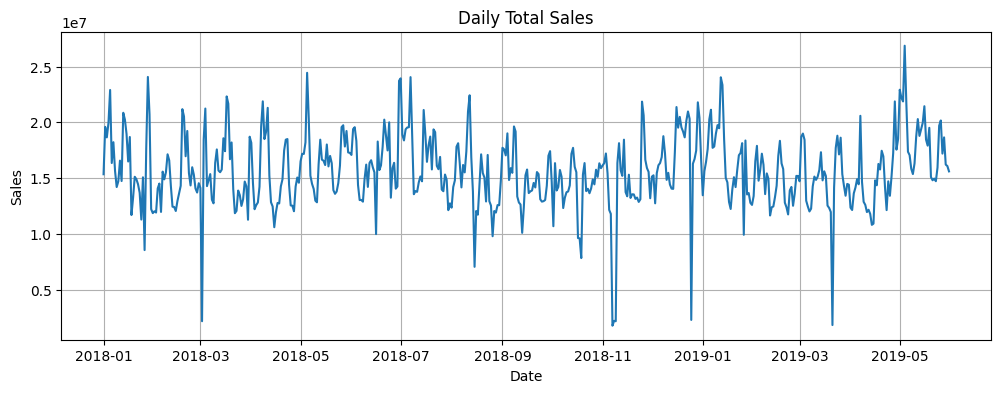

In [ ]:
plt.figure(figsize=(12, 4))
plt.plot(df_daily_sales['Date'], df_daily_sales['Sales'])
plt.title('Daily Total Sales')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.grid(True)
plt.show()


In [ ]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(df_daily_sales['Sales'])
print("ADF Statistic:", result[0])
print("p-value:", result[1])


# If p-value < 0.05, the series is likely stationary.

# If p-value >= 0.05, the series is non-stationary and needs differencing.

if result[1] < 0.05:
  print("The series is likely stationary.")
else:
  print("The series is non-stationary and needs differencing.")


ADF Statistic: -3.5242079065633227
p-value: 0.007386718711362291
The series is likely stationary.


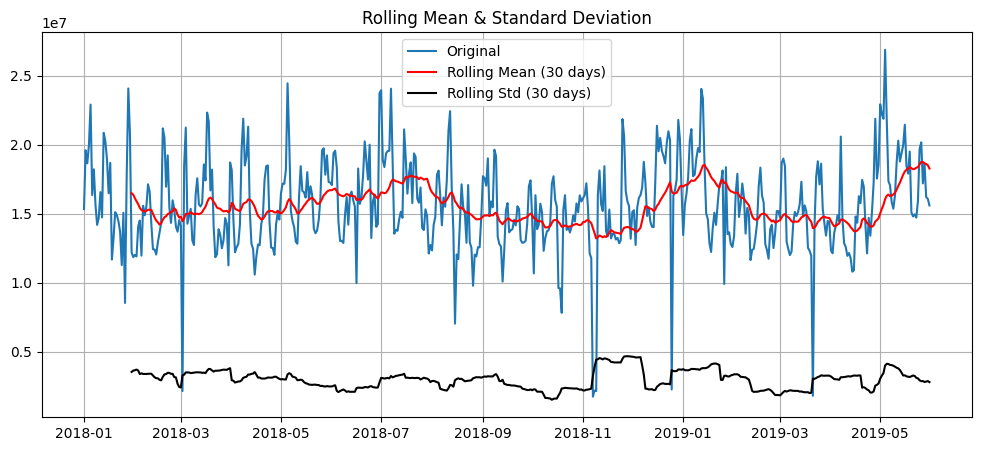

In [ ]:
#  in a stationary series, the rolling mean and std should be relatively flat over time.

# Set date as index
df_daily_sales.set_index('Date', inplace=True)

# Compute rolling statistics
rolling_mean = df_daily_sales['Sales'].rolling(window=30).mean()
rolling_std = df_daily_sales['Sales'].rolling(window=30).std()

# Plot original series with rolling mean and std
plt.figure(figsize=(12, 5))
plt.plot(df_daily_sales['Sales'], label='Original')
plt.plot(rolling_mean, color='red', label='Rolling Mean (30 days)')
plt.plot(rolling_std, color='black', label='Rolling Std (30 days)')
plt.title('Rolling Mean & Standard Deviation')
plt.legend()
plt.grid(True)
plt.show()


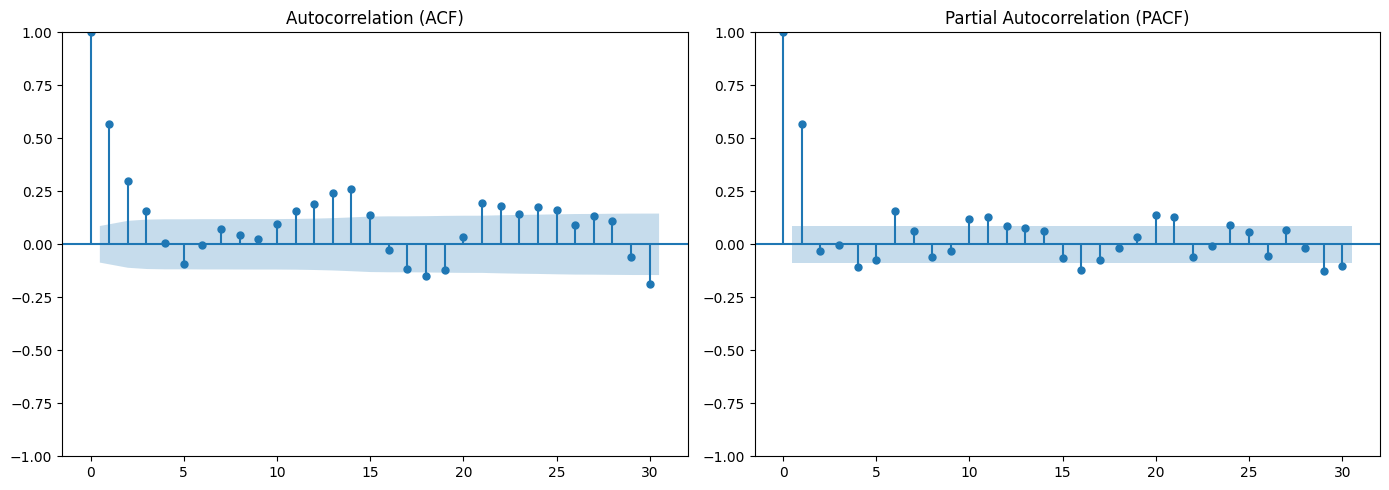

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plt.figure(figsize=(14, 5))

# ACF
plt.subplot(1, 2, 1)
plot_acf(df_daily_sales['Sales'], lags=30, ax=plt.gca())
plt.title('Autocorrelation (ACF)')

# PACF
plt.subplot(1, 2, 2)
plot_pacf(df_daily_sales['Sales'], lags=30, ax=plt.gca(), method='ywm')
plt.title('Partial Autocorrelation (PACF)')

plt.tight_layout()
plt.show()


In [ ]:
from statsmodels.tsa.arima.model import ARIMA

# Fit ARMA(1,2) model (AR=1, MA=2)
arma_model = ARIMA(df_daily_sales['Sales'], order=(1, 0, 2))  # (p, d, q) → d=0 because it's stationary
arma_result = arma_model.fit()

# Summary
print(arma_result.summary())


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  Sales   No. Observations:                  516
Model:                 ARIMA(1, 0, 2)   Log Likelihood               -8371.392
Date:                Fri, 16 May 2025   AIC                          16752.785
Time:                        09:32:38   BIC                          16774.015
Sample:                    01-01-2018   HQIC                         16761.104
                         - 05-31-2019                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.562e+07   2.73e+05     57.223      0.000    1.51e+07    1.62e+07
ar.L1          0.5347      0.113      4.740      0.000       0.314       0.756
ma.L1          0.0523      0.120      0.434      0.6

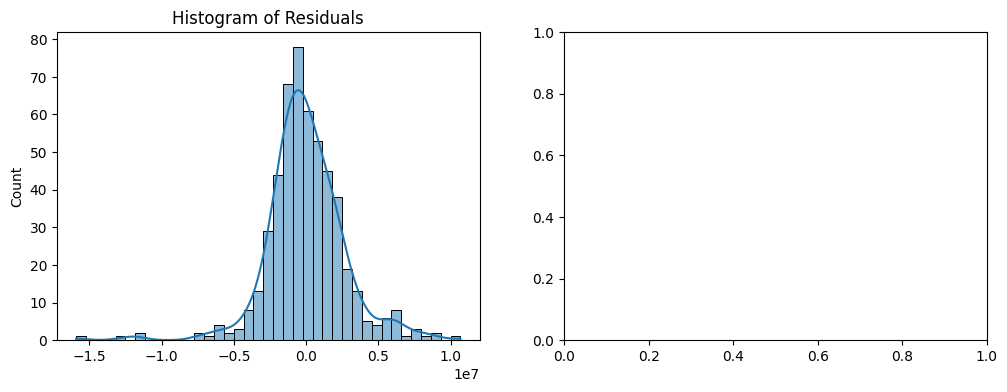

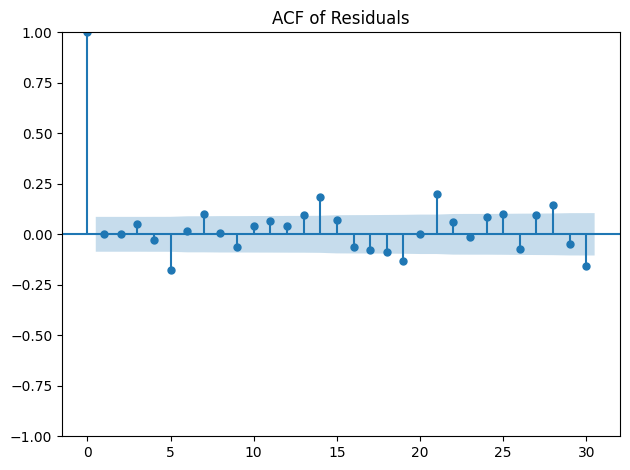

      lb_stat  lb_pvalue
10  26.951683   0.002651


In [ ]:
from statsmodels.stats.diagnostic import acorr_ljungbox

# Residuals
residuals = arma_result.resid

# 1. Plot residuals
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
sns.histplot(residuals, kde=True)
plt.title('Histogram of Residuals')

plt.subplot(1, 2, 2)
plot_acf(residuals, lags=30)
plt.title('ACF of Residuals')
plt.tight_layout()
plt.show()

# 2. Ljung-Box test for autocorrelation
ljung_test = acorr_ljungbox(residuals, lags=[10], return_df=True)
print(ljung_test)


✅ 1. Histogram of Residuals
The histogram of residuals is roughly bell-shaped and centered around 0.

This is a good sign — it suggests residuals are approximately normally distributed, which aligns with ARMA model assumptions.

✅ 2. ACF of Residuals
Most spikes fall within the confidence band (shaded region).

However, a few spikes (e.g., at lag 10, 20, 24) seem to breach the threshold, which could suggest some autocorrelation remains.

Null Hypothesis (H₀): Residuals are independently distributed (i.e., white noise).

Interpretation: Since p-value < 0.05, we reject H₀.

✅ Conclusion: There is evidence of autocorrelation in the residuals. The ARMA(1,2) model has not captured all temporal patterns.

## SARIMAX

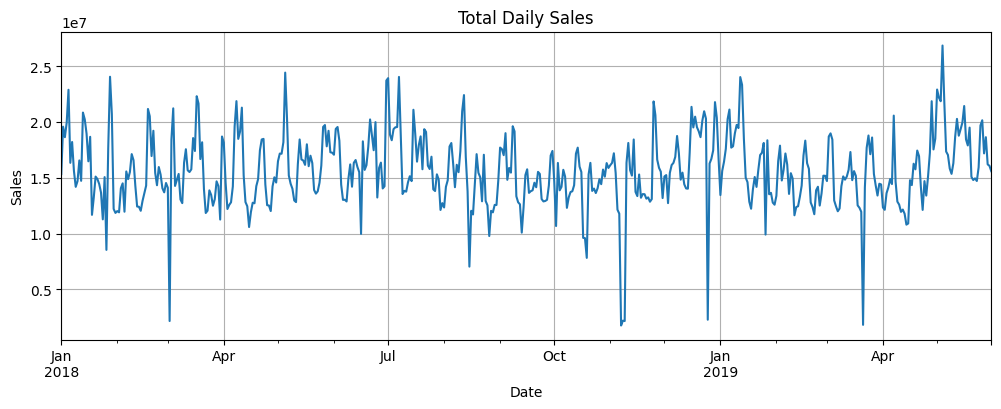

In [ ]:
# Aggregate total daily sales
daily_sales = df_train_encoded.groupby('Date')['Sales'].sum().asfreq('D')

# Fill any missing dates (if any) with zeros or interpolation
daily_sales = daily_sales.fillna(0)

# Visual check (optional)

daily_sales.plot(figsize=(12, 4), title="Total Daily Sales")
plt.ylabel("Sales")
plt.xlabel("Date")
plt.grid()
plt.show()


In [ ]:
from statsmodels.tsa.stattools import adfuller

# ADF test
adf_result = adfuller(daily_sales)

print(f"ADF Statistic: {adf_result[0]:.4f}")
print(f"p-value: {adf_result[1]:.4f}")

if adf_result[1] < 0.05:
    print("✅ The series is stationary.")
else:
    print("⚠️ The series is not stationary. Differencing is needed.")


ADF Statistic: -3.5242
p-value: 0.0074
✅ The series is stationary.


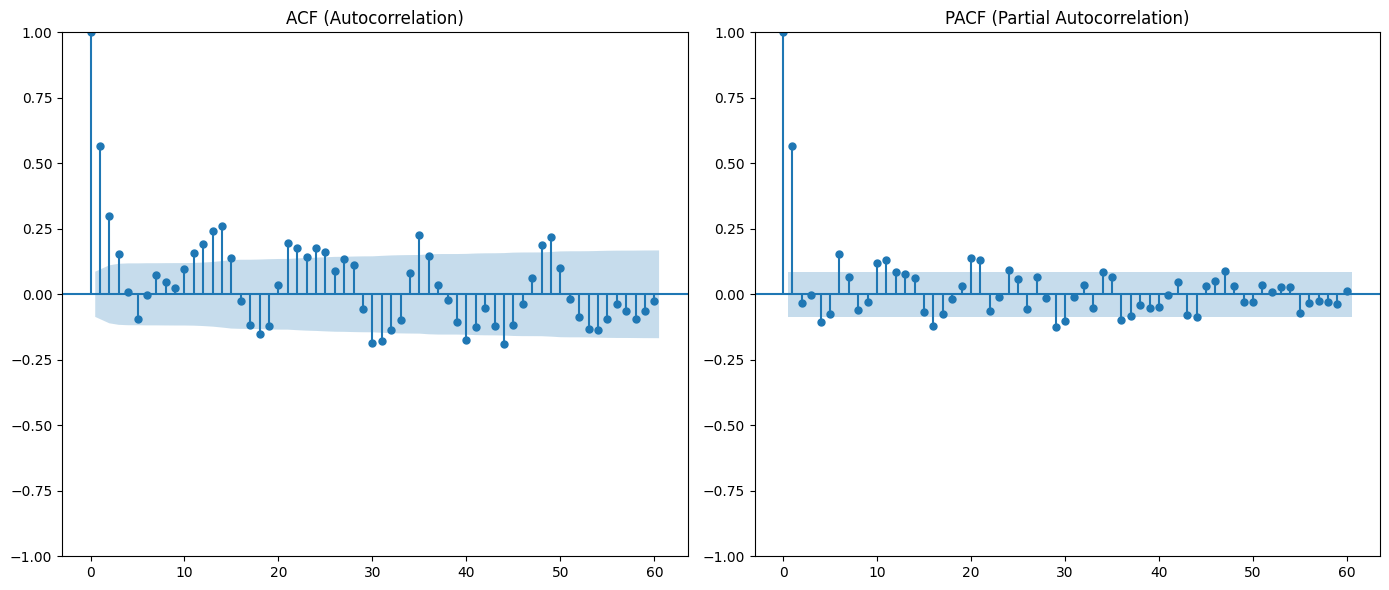

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plot_acf(daily_sales, lags=60, ax=plt.gca())
plt.title('ACF (Autocorrelation)')

plt.subplot(1, 2, 2)
plot_pacf(daily_sales, lags=60, ax=plt.gca(), method='ywm')
plt.title('PACF (Partial Autocorrelation)')

plt.tight_layout()
plt.show()


In [ ]:
store_1_df = df_train[df_train['Store_id'] == 1].copy()
store_1_df.sort_values('Date', inplace=True)

In [ ]:
store_1_df.set_index('Date', inplace=True)
store_1_df = store_1_df.asfreq('D')  # assumes daily frequency

from statsmodels.tsa.stattools import adfuller

adf_result = adfuller(store_1_df['Sales'].dropna())

print(f"ADF Statistic: {adf_result[0]:.4f}")
print(f"p-value: {adf_result[1]:.4f}")

if adf_result[1] < 0.05:
    print("✅ The series is stationary.")
else:
    print("❌ The series is NOT stationary.")


ADF Statistic: -4.0897
p-value: 0.0010
✅ The series is stationary.


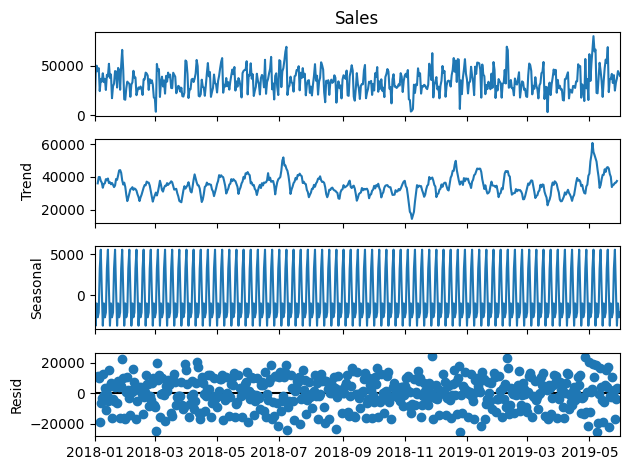

In [ ]:
# checking whether total sales for a single store at a time is also stationary or not
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(store_1_df['Sales'], model='additive', period=7)  # weekly seasonality if suspected
result.plot()
plt.show()

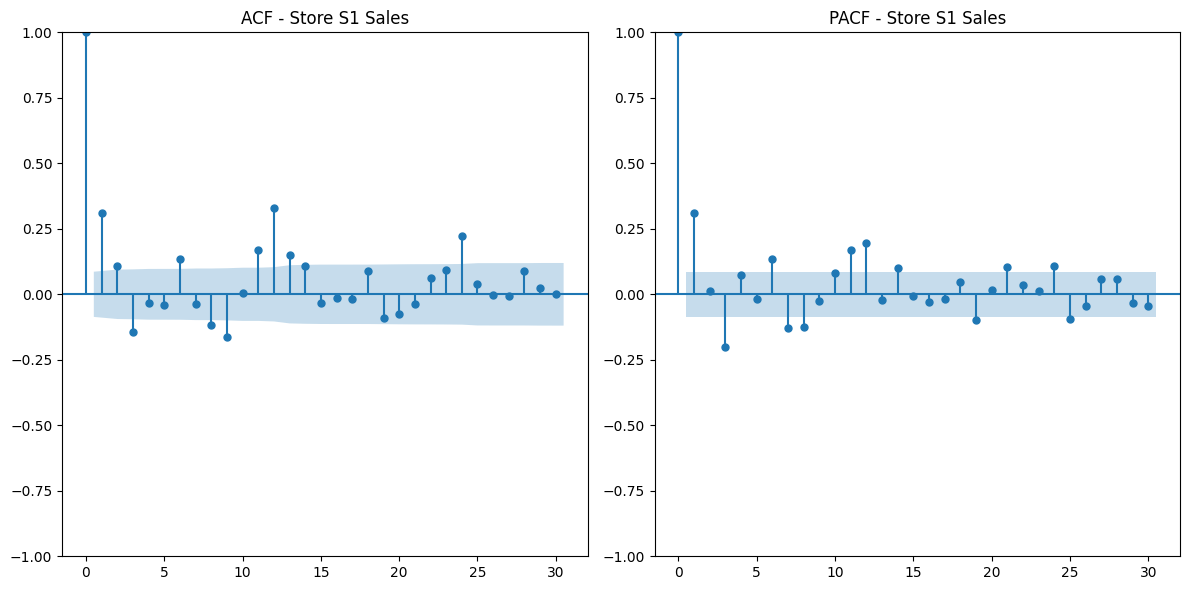

In [ ]:
plt.figure(figsize=(12, 6))

# Plot ACF
plt.subplot(1, 2, 1)
plot_acf(store_1_df['Sales'], lags=30, ax=plt.gca())
plt.title('ACF - Store S1 Sales')

# Plot PACF
plt.subplot(1, 2, 2)
plot_pacf(store_1_df['Sales'], lags=30, method='ywm', ax=plt.gca())
plt.title('PACF - Store S1 Sales')

plt.tight_layout()
plt.show()

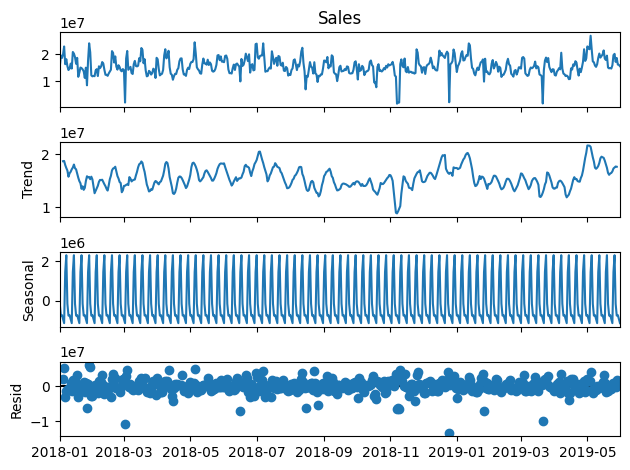

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(daily_sales, model='additive', period=7)  # weekly seasonality if suspected
result.plot()
plt.show()


In [ ]:
import statsmodels.api as sm

# Fit SARIMAX model
sarimax_model = sm.tsa.statespace.SARIMAX(daily_sales,
                                         order=(1, 1, 1),
                                         seasonal_order=(1, 1, 1, 7),
                                         enforce_stationarity=False,
                                         enforce_invertibility=False)

sarimax_results = sarimax_model.fit(disp=False)

print(sarimax_results.summary())


                                     SARIMAX Results                                     
Dep. Variable:                             Sales   No. Observations:                  516
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 7)   Log Likelihood               -8161.813
Date:                           Fri, 16 May 2025   AIC                          16333.626
Time:                                   09:32:43   BIC                          16354.689
Sample:                               01-01-2018   HQIC                         16341.892
                                    - 05-31-2019                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3511      0.117      2.994      0.003       0.121       0.581
ma.L1         -0.6889      0.093     -7.440

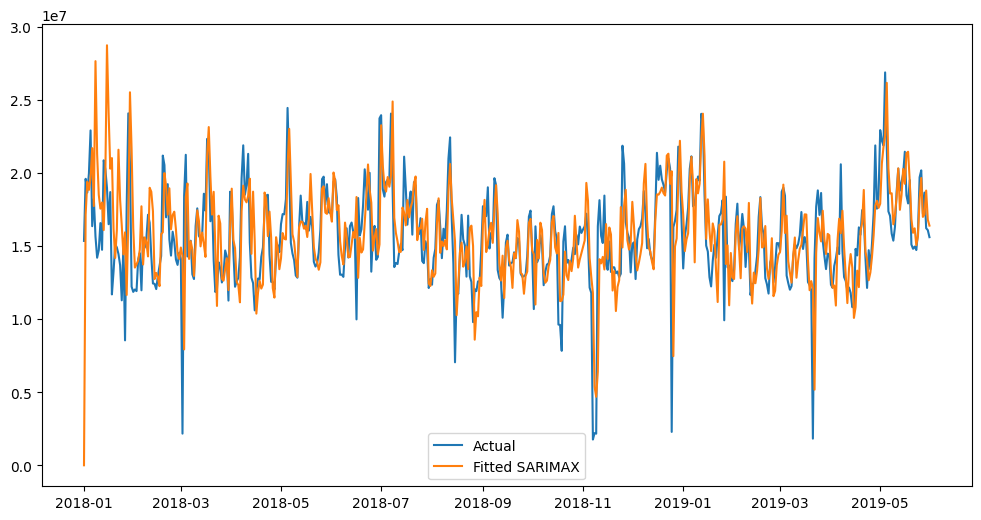

In [ ]:
import matplotlib.pyplot as plt

# In-sample prediction (fitted values)
fitted_values = sarimax_results.fittedvalues

plt.figure(figsize=(12,6))
plt.plot(daily_sales.index, daily_sales, label='Actual')
plt.plot(daily_sales.index, fitted_values, label='Fitted SARIMAX')
plt.legend()
plt.show()


In [ ]:
n_forecast = 30
forecast = sarimax_results.get_forecast(steps=n_forecast)
forecast_mean = forecast.predicted_mean
forecast_ci = forecast.conf_int()

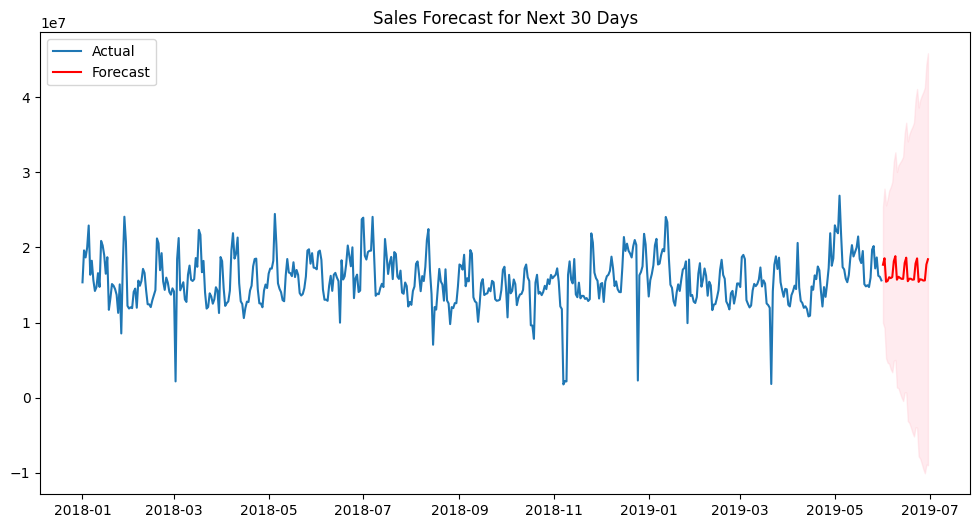

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(daily_sales.index, daily_sales, label='Actual')
plt.plot(forecast_mean.index, forecast_mean, label='Forecast', color='red')
plt.fill_between(forecast_ci.index,
                 forecast_ci.iloc[:, 0],
                 forecast_ci.iloc[:, 1], color='pink', alpha=0.3)
plt.legend()
plt.title(f'Sales Forecast for Next {n_forecast} Days')
plt.show()


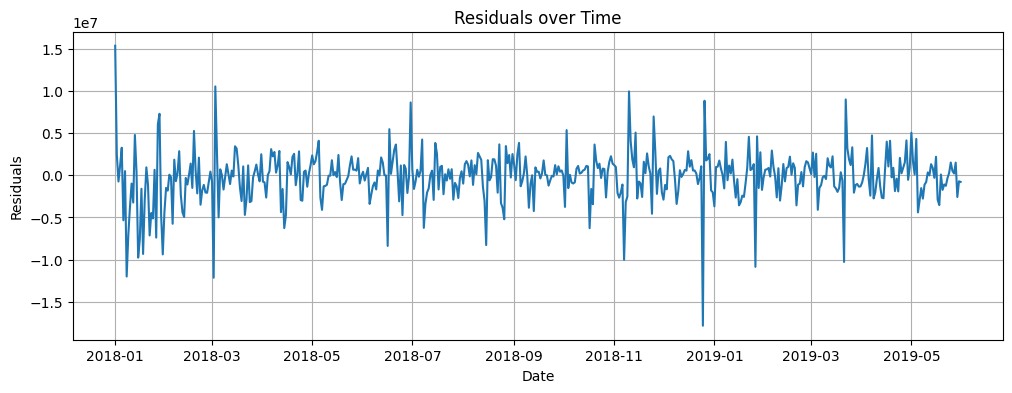

In [ ]:
residuals = sarimax_results.resid
plt.figure(figsize=(12, 4))
plt.plot(residuals)
plt.title("Residuals over Time")
plt.xlabel("Date")
plt.ylabel("Residuals")
plt.grid(True)
plt.show()

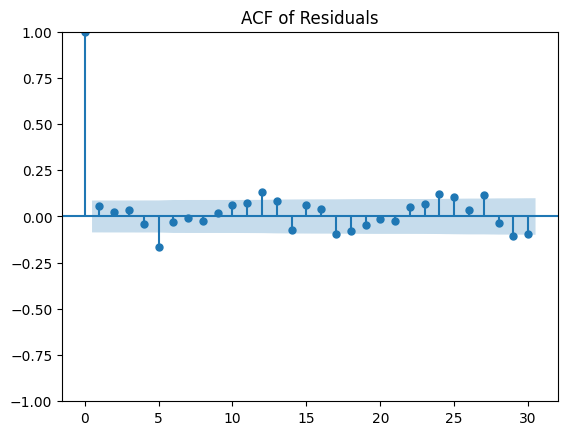

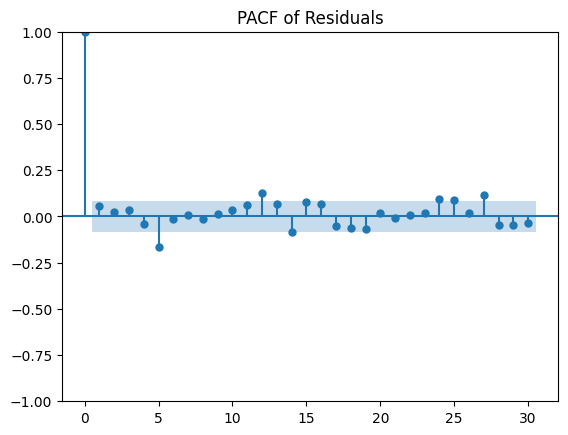

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(residuals, lags=30)
plt.title("ACF of Residuals")
plt.show()

plot_pacf(residuals, lags=30)
plt.title("PACF of Residuals")
plt.show()


In [ ]:
from statsmodels.stats.diagnostic import acorr_ljungbox

lb_test = acorr_ljungbox(residuals, lags=[10], return_df=True)
print(lb_test)


      lb_stat  lb_pvalue
10  20.669999   0.023516


Since p-value < 0.05, we reject the null hypothesis that residuals are white noise.

This means residuals still exhibit autocorrelation — i.e., your SARIMAX model hasn’t fully captured all temporal patterns.

## Stacking

In [ ]:
from statsmodels.tsa.stattools import adfuller

# Ensure 'Date' column is datetime
df_train_encoded['Date'] = pd.to_datetime(df_train_encoded['Date'])

store_type_cols = ['Store_Type_S1', 'Store_Type_S2', 'Store_Type_S3', 'Store_Type_S4']

all_dates = pd.date_range(df_train_encoded['Date'].min(), df_train_encoded['Date'].max())

for col in store_type_cols:
    print(f"Processing {col}...")

    # Filter rows for this Store_Type
    temp_df = df_train_encoded[df_train_encoded[col] == 1]

    # Aggregate daily sales
    daily_sales = temp_df.groupby('Date')['Sales'].sum().reindex(all_dates).fillna(0)

    # Run ADF test for stationarity
    adf_result = adfuller(daily_sales)
    p_value = adf_result[1]

    print(f"ADF p-value for {col}: {p_value:.4f}")


Processing Store_Type_S1...
ADF p-value for Store_Type_S1: 0.0057
Processing Store_Type_S2...
ADF p-value for Store_Type_S2: 0.0036
Processing Store_Type_S3...
ADF p-value for Store_Type_S3: 0.0113
Processing Store_Type_S4...
ADF p-value for Store_Type_S4: 0.0094


All p-values are below 0.05, which means the daily sales per Store_Type are stationary — no differencing needed.

ACF and PACF plots help us decide the AR (p) and MA (q) orders for the ARMA model.


But since we have 300+ stores and multiple groupings, doing ACF/PACF for each store_type might be time-consuming.

Quick approach:
We will use a fixed ARMA order (like (2,0,2)) for all store types. This often works reasonably well as a starting point.

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

store_type_forecasts = {}

for col in store_type_cols:
    print(f"Fitting ARMA model for {col}...")

    temp_df = df_train_encoded[df_train_encoded[col] == 1]
    daily_sales = temp_df.groupby('Date')['Sales'].sum().reindex(all_dates).fillna(0)

    # Fit ARMA(2,2) model
    model = ARIMA(daily_sales, order=(2, 0, 2))
    model_fit = model.fit()

    # Get in-sample predictions for all dates
    preds = model_fit.predict(start=0, end=len(daily_sales) - 1)
    preds.index = all_dates

    store_type_forecasts[col] = preds


Fitting ARMA model for Store_Type_S1...
Fitting ARMA model for Store_Type_S2...
Fitting ARMA model for Store_Type_S3...
Fitting ARMA model for Store_Type_S4...


In [ ]:
def add_store_type_arma_feature(df, store_type_forecasts):
    import numpy as np
    df['Store_Type_ARMA_Pred'] = np.nan

    for col, forecast in store_type_forecasts.items():
        mask = df[col] == 1
        df.loc[mask, 'Store_Type_ARMA_Pred'] = df.loc[mask, 'Date'].map(forecast)

    return df

df_train_encoded = add_store_type_arma_feature(df_train_encoded, store_type_forecasts)
df_val = add_store_type_arma_feature(df_val, store_type_forecasts)
df_test = add_store_type_arma_feature(df_test, store_type_forecasts)

In [ ]:
# Check if column exists
print('Store_Type_ARMA_Pred' in df_train_encoded.columns)

# Check number of non-null values
print("Train non-null count:", df_train_encoded['Store_Type_ARMA_Pred'].notnull().sum())

# Check some sample values along with Store_Type and Date
print(df_train_encoded[['Date', 'Store_Type_S1', 'Store_Type_S2', 'Store_Type_ARMA_Pred']].head(10))

# Check summary stats of the new column
print(df_train_encoded['Store_Type_ARMA_Pred'].describe())

True
Train non-null count: 188340
          Date  Store_Type_S1  Store_Type_S2  Store_Type_ARMA_Pred
0   2018-01-01           True          False          6.480360e+06
114 2018-01-01          False          False          2.259027e+06
127 2018-01-01          False          False          5.335166e+06
96  2018-01-01           True          False          6.480360e+06
132 2018-01-01           True          False          6.480360e+06
167 2018-01-01          False          False          5.335166e+06
135 2018-01-01          False          False          2.259027e+06
148 2018-01-01          False          False          5.335166e+06
29  2018-01-01           True          False          6.480360e+06
31  2018-01-01          False          False          5.335166e+06
count    1.883400e+05
mean     4.888407e+06
std      2.063662e+06
min      7.669353e+05
25%      2.418711e+06
50%      5.646425e+06
75%      6.407954e+06
max      8.678667e+06
Name: Store_Type_ARMA_Pred, dtype: float64


In [ ]:
location_type_cols = ['Location_Type_L1', 'Location_Type_L2', 'Location_Type_L3', 'Location_Type_L4', 'Location_Type_L5']

for col in location_type_cols:
    print(f"Processing {col}...")

    temp_df = df_train_encoded[df_train_encoded[col] == 1]
    daily_sales = temp_df.groupby('Date')['Sales'].sum().reindex(all_dates).fillna(0)

    adf_result = adfuller(daily_sales)
    p_value = adf_result[1]

    print(f"ADF p-value for {col}: {p_value:.4f}")


Processing Location_Type_L1...
ADF p-value for Location_Type_L1: 0.0074
Processing Location_Type_L2...
ADF p-value for Location_Type_L2: 0.0092
Processing Location_Type_L3...
ADF p-value for Location_Type_L3: 0.0041
Processing Location_Type_L4...
ADF p-value for Location_Type_L4: 0.0029
Processing Location_Type_L5...
ADF p-value for Location_Type_L5: 0.0042


All Location_Type daily sales are stationary (p-values < 0.05), so no differencing needed!

In [ ]:
location_type_forecasts = {}

for col in location_type_cols:
    print(f"Fitting ARMA model for {col}...")

    temp_df = df_train_encoded[df_train_encoded[col] == 1]
    daily_sales = temp_df.groupby('Date')['Sales'].sum().reindex(all_dates).fillna(0)

    model = ARIMA(daily_sales, order=(2, 0, 2))
    model_fit = model.fit()

    preds = model_fit.predict(start=0, end=len(daily_sales) - 1)
    preds.index = all_dates

    location_type_forecasts[col] = preds


Fitting ARMA model for Location_Type_L1...
Fitting ARMA model for Location_Type_L2...
Fitting ARMA model for Location_Type_L3...
Fitting ARMA model for Location_Type_L4...
Fitting ARMA model for Location_Type_L5...


In [ ]:
def add_location_type_arma_feature(df, location_type_forecasts):
    import numpy as np
    df['Location_Type_ARMA_Pred'] = np.nan

    for col, forecast in location_type_forecasts.items():
        mask = df[col] == 1
        df.loc[mask, 'Location_Type_ARMA_Pred'] = df.loc[mask, 'Date'].map(forecast)

    return df

df_train_encoded = add_location_type_arma_feature(df_train_encoded, location_type_forecasts)
df_val = add_location_type_arma_feature(df_val, location_type_forecasts)
df_test = add_location_type_arma_feature(df_test, location_type_forecasts)


In [ ]:
print(df_train_encoded['Location_Type_ARMA_Pred'].notnull().sum())
print(df_train_encoded[['Date', 'Location_Type_L1', 'Location_Type_ARMA_Pred']].head(10))

188340
          Date  Location_Type_L1  Location_Type_ARMA_Pred
0   2018-01-01             False             1.918191e+06
114 2018-01-01              True             6.839844e+06
127 2018-01-01             False             5.567759e+06
96  2018-01-01              True             6.839844e+06
132 2018-01-01              True             6.839844e+06
167 2018-01-01              True             6.839844e+06
135 2018-01-01              True             6.839844e+06
148 2018-01-01             False             5.567759e+06
29  2018-01-01              True             6.839844e+06
31  2018-01-01             False             5.567759e+06


In [ ]:
region_code_cols = ['Region_Code_R1', 'Region_Code_R2', 'Region_Code_R3', 'Region_Code_R4']

for col in region_code_cols:
    print(f"Processing {col}...")

    temp_df = df_train_encoded[df_train_encoded[col] == 1]
    daily_sales = temp_df.groupby('Date')['Sales'].sum().reindex(all_dates).fillna(0)

    adf_result = adfuller(daily_sales)
    p_value = adf_result[1]

    print(f"ADF p-value for {col}: {p_value:.4f}")


Processing Region_Code_R1...
ADF p-value for Region_Code_R1: 0.0089
Processing Region_Code_R2...
ADF p-value for Region_Code_R2: 0.0061
Processing Region_Code_R3...
ADF p-value for Region_Code_R3: 0.0060
Processing Region_Code_R4...
ADF p-value for Region_Code_R4: 0.0057


All Region_Code series are stationary (p < 0.05), so we're good to fit ARMA(2,0,2) directly.

In [ ]:
region_code_forecasts = {}

for col in region_code_cols:
    print(f"Fitting ARMA model for {col}...")

    temp_df = df_train_encoded[df_train_encoded[col] == 1]
    daily_sales = temp_df.groupby('Date')['Sales'].sum().reindex(all_dates).fillna(0)

    model = ARIMA(daily_sales, order=(2, 0, 2))
    model_fit = model.fit()

    preds = model_fit.predict(start=0, end=len(daily_sales) - 1)
    preds.index = all_dates

    region_code_forecasts[col] = preds


Fitting ARMA model for Region_Code_R1...
Fitting ARMA model for Region_Code_R2...
Fitting ARMA model for Region_Code_R3...
Fitting ARMA model for Region_Code_R4...


In [ ]:
def add_region_code_arma_feature(df, region_code_forecasts):
    import numpy as np
    df['Region_Code_ARMA_Pred'] = np.nan

    for col, forecast in region_code_forecasts.items():
        mask = df[col] == 1
        df.loc[mask, 'Region_Code_ARMA_Pred'] = df.loc[mask, 'Date'].map(forecast)

    return df

df_train_encoded = add_region_code_arma_feature(df_train_encoded, region_code_forecasts)
df_val = add_region_code_arma_feature(df_val, region_code_forecasts)
df_test = add_region_code_arma_feature(df_test, region_code_forecasts)


In [ ]:
print(df_train_encoded['Region_Code_ARMA_Pred'].notnull().sum())
print(df_train_encoded[['Date', 'Region_Code_R1', 'Region_Code_ARMA_Pred']].head(10))

188340
          Date  Region_Code_R1  Region_Code_ARMA_Pred
0   2018-01-01            True           5.798921e+06
114 2018-01-01           False           3.624428e+06
127 2018-01-01            True           5.798921e+06
96  2018-01-01           False           4.205759e+06
132 2018-01-01           False           3.624428e+06
167 2018-01-01            True           5.798921e+06
135 2018-01-01           False           3.624428e+06
148 2018-01-01           False           4.205759e+06
29  2018-01-01            True           5.798921e+06
31  2018-01-01           False           3.624428e+06


In [ ]:
df_train_final.head()

,ID,Store_id,Date,Holiday,Discount,No_of_orders,Sales,Month,Weekday,Week,...,Store_Type_S4,Location_Type_L1,Location_Type_L2,Location_Type_L3,Location_Type_L4,Location_Type_L5,Region_Code_R1,Region_Code_R2,Region_Code_R3,Region_Code_R4
2018-01-08_1,T1002742,1,2018-01-08,False,True,52,34101.0,1,0,2,...,False,False,False,True,False,False,True,False,False,False
2018-01-08_2,T1002817,2,2018-01-08,False,True,65,44841.0,1,0,2,...,False,True,False,False,False,False,False,False,True,False
2018-01-08_3,T1002618,3,2018-01-08,False,True,91,55965.0,1,0,2,...,True,False,True,False,False,False,True,False,False,False
2018-01-08_4,T1002575,4,2018-01-08,False,True,51,33744.0,1,0,2,...,False,True,False,False,False,False,False,True,False,False
2018-01-08_5,T1002843,5,2018-01-08,False,True,58,42027.0,1,0,2,...,False,True,False,False,False,False,False,False,True,False


In [ ]:
# Updated feature list
feature_cols = [col for col in df_train_encoded.columns
                if col not in ['ID', 'Date', 'Sales', 'Sales_log', 'No_of_orders']]

# Drop any remaining rows with missing values
df_train_final = df_train_encoded.dropna()
df_val = df_val.dropna()
df_test = df_test.dropna()

# Inputs and targets
X_train = df_train_final[feature_cols]
y_train = df_train_final['Sales_log']

X_val = df_val[feature_cols]
y_val = df_val['Sales_log']

X_test = df_test[feature_cols]
y_test = df_test['Sales_log']  # if available


In [ ]:
X_train.head()

,Store_id,Holiday,Discount,Month,Weekday,Week,Sales_lag_1,Sales_lag_2,Sales_lag_3,Sales_lag_4,...,Location_Type_L3,Location_Type_L4,Location_Type_L5,Region_Code_R1,Region_Code_R2,Region_Code_R3,Region_Code_R4,Store_Type_ARMA_Pred,Location_Type_ARMA_Pred,Region_Code_ARMA_Pred
2741,1,False,True,1,0,2,10.514774,10.106265,10.770693,10.700950,...,True,False,False,True,False,False,False,6.876849e+06,2.042017e+06,6.101153e+06
2816,2,False,True,1,0,2,10.782159,10.449873,10.964415,11.041000,...,False,False,False,False,False,True,False,2.454903e+06,7.272221e+06,3.871838e+06
2617,3,False,True,1,0,2,11.070895,10.780538,11.175437,10.997456,...,False,False,False,True,False,False,False,5.715693e+06,5.967469e+06,6.101153e+06
2574,4,False,True,1,0,2,10.716837,10.232000,10.835947,10.709696,...,False,False,False,False,True,False,False,6.876849e+06,7.272221e+06,4.456627e+06
2842,5,False,True,1,0,2,10.767284,10.746455,11.013600,10.842537,...,False,False,False,False,False,True,False,6.876849e+06,7.272221e+06,3.871838e+06


In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Initialize and fit the model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
rf_model.fit(X_train, y_train)

# Predictions on training set
train_preds_log = rf_model.predict(X_train)
train_preds = np.expm1(train_preds_log)
y_train_actual = np.expm1(y_train)

print("📊 Train Set Performance:")
performance_metric(y_train_actual, train_preds)

# Predictions on validation set
val_preds_log = rf_model.predict(X_val)
val_preds = np.expm1(val_preds_log)
y_val_actual = np.expm1(y_val)

print("\n📊 Validation Set Performance:")
performance_metric(y_val_actual, val_preds)


📊 Train Set Performance:
RMSE: 2877.92
R² Score: 0.9756
MAPE: 4.30%

📊 Validation Set Performance:
RMSE: 3142.31
R² Score: 0.9749
MAPE: 4.71%


In [ ]:
import pickle

# Replace `final_model` with your actual model variable name
with open('model.pkl', 'wb') as f:
    pickle.dump(rf_model, f)


In [ ]:
# Save ARMA forecast dictionaries used for inference
with open('store_type_forecasts.pkl', 'wb') as f:
    pickle.dump(store_type_forecasts, f)

with open('location_type_forecasts.pkl', 'wb') as f:
    pickle.dump(location_type_forecasts, f)

with open('region_code_forecasts.pkl', 'wb') as f:
    pickle.dump(region_code_forecasts, f)


In [ ]:
# Create requirements.txt with only relevant packages
!pip freeze | grep -E 'pandas|numpy|scikit-learn|joblib|flask|statsmodels' > requirements.txt

In [ ]:
from google.colab import files
files.download("model.pkl")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>